# <p style="text-align: center;">**Car Damage Detection with Detectron2**</p>


## Importing Libraries

Installing Detectron2

In [1]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-07jx7el7
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-07jx7el7
  Resolved https://github.com/facebookresearch/detectron2.git to commit 7801ac3d595a0663d16c0c9a6a339c77b2ddbdfb
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 145 kB 40.3 MB/s 
     |████████████████████████████████| 130 kB 68.1 MB/s 
     |████████████████████████████████| 112 kB 66.2 MB/s 
  Created wheel for detectron2: filename=detectron2-0.6-cp37-cp37m-linux_x86_64.whl size=5727590 sha256=2f97453d20d44143df77e8ed3f46f3f110db97b9b1aaead39f2d7a11b1866b84
  Stored in directory: /tmp/pip-ephem-wheel-cache-p770kw60/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7d149d69c27ca5d
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=0d6c81

Importing Torch

In [2]:
import torch, torchvision
print(torch.cuda.is_available())
import os, pickle ,random
import cv2 as cv
import matplotlib.pyplot as plt

True


In [3]:
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import ColorMode

## Getting Models from Detectron2 Model Zoo

In [4]:
config_file_path = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
output_dir = "./instance_segmentation"
num_classes = 1
device = "cuda"

## Loading Dataset

In [5]:
train_dataset_name = "Damage_train"
train_images_path = "../input/damage-detection-dataset/train"
train_json_annot_path = "../input/damage-detection-dataset/train/COCO_train_annos.json"
val_dataset_name = "Damage_val"
val_images_path = "../input/damage-detection-dataset/val"
val_json_annot_path = "../input/damage-detection-dataset/val/COCO_val_annos.json"

## Registering Datasets

In [6]:
register_coco_instances(name = train_dataset_name, metadata = {},
                       json_file = train_json_annot_path, 
                        image_root = train_images_path)

In [7]:
register_coco_instances(name = val_dataset_name, metadata = {},
                       json_file = val_json_annot_path, 
                        image_root = val_images_path)

In [8]:
cfg_save_path = "IS_cfg.pickle"

## Data Visualization

In [9]:
def plot_samples(dataset_name, n = 1):
    dataset_custom = DatasetCatalog.get(dataset_name)
    dataset_custom_metadata = MetadataCatalog.get(dataset_name)
    
    for s in random.sample(dataset_custom, n):
        img = cv.imread(s["file_name"])
        v = Visualizer(img[:,:,::-1], metadata=dataset_custom_metadata, scale = 0.5)
        v = v.draw_dataset_dict(s)
        plt.figure(figsize = (15,20))
        plt.imshow(v.get_image())
        plt.show()
    

[11/20 12:21:05 d2.data.datasets.coco]: Loaded 59 images in COCO format from ../input/damage-detection-dataset/train/COCO_train_annos.json


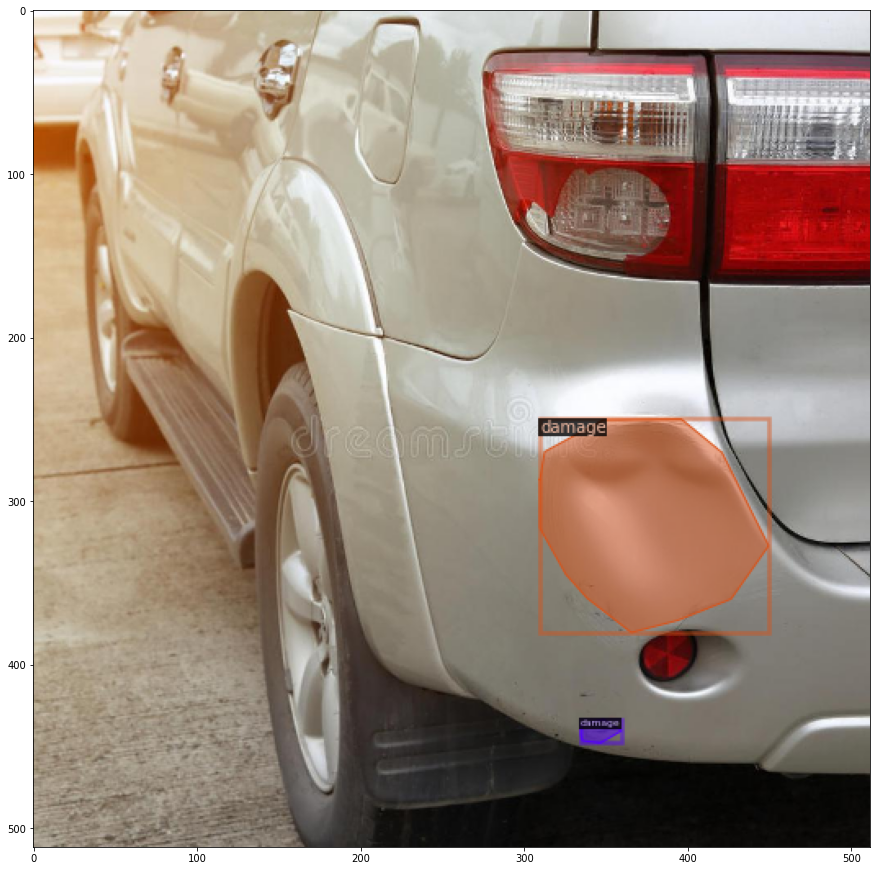

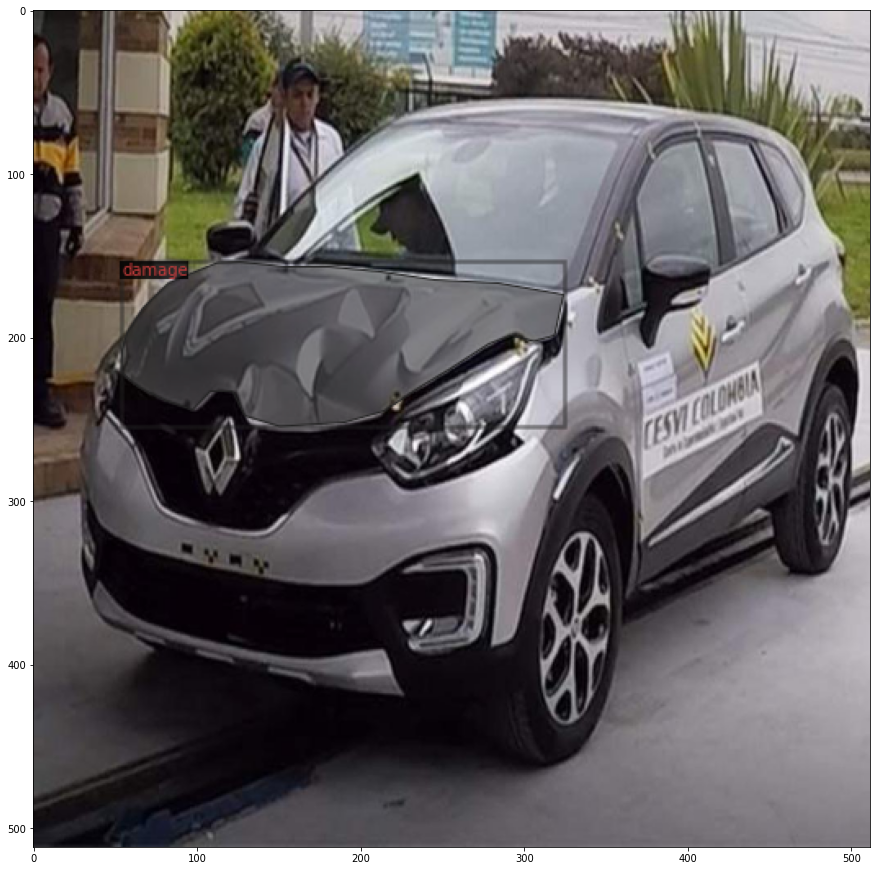

In [10]:
#Verifying
plot_samples(dataset_name = train_dataset_name, n = 2)

## Training

In [11]:
def get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir):
    cfg = get_cfg()
    
    cfg.merge_from_file(model_zoo.get_config_file(config_file_path))
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
    cfg.DATASETS.TRAIN = (train_dataset_name,)
    cfg.DATASETS.TEST = (val_dataset_name,)
    
    cfg.DATALOADER.NUM_WORKERS = 2
    
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.00025
    cfg.SOLVER.MAX_ITER = 1000
    cfg.SOLVER.STEPS = []
    
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
    cfg.MODEL.DEVICE = device
    cfg.OUTPUT_DIR = output_dir
    
    return cfg

In [12]:
def main():
    cfg = get_train_cfg(config_file_path, checkpoint_url, train_dataset_name, val_dataset_name, num_classes, device, output_dir)
    
    with open(cfg_save_path,"wb") as f:
        pickle.dump(cfg, f, protocol = pickle.HIGHEST_PROTOCOL)
    
    os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)
    
    trainer = DefaultTrainer(cfg)
    trainer.resume_or_load(resume = False)
    
    trainer.train()
    

In [13]:
main()

[11/20 12:21:11 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:08, 22.0MB/s]                           


[11/20 12:21:24 d2.engine.train_loop]: Starting training from iteration 0
[11/20 12:21:36 d2.utils.events]:  eta: 0:04:14  iter: 19  total_loss: 1.759  loss_cls: 0.7433  loss_box_reg: 0.1093  loss_mask: 0.6923  loss_rpn_cls: 0.1928  loss_rpn_loc: 0.02666  time: 0.2588  data_time: 0.0157  lr: 4.9953e-06  max_mem: 1862M
[11/20 12:21:41 d2.utils.events]:  eta: 0:04:05  iter: 39  total_loss: 1.551  loss_cls: 0.6296  loss_box_reg: 0.07934  loss_mask: 0.6909  loss_rpn_cls: 0.1302  loss_rpn_loc: 0.01177  time: 0.2543  data_time: 0.0061  lr: 9.9902e-06  max_mem: 1862M
[11/20 12:21:46 d2.utils.events]:  eta: 0:04:00  iter: 59  total_loss: 1.49  loss_cls: 0.4837  loss_box_reg: 0.08936  loss_mask: 0.6865  loss_rpn_cls: 0.1368  loss_rpn_loc: 0.02093  time: 0.2575  data_time: 0.0077  lr: 1.4985e-05  max_mem: 1862M
[11/20 12:21:52 d2.utils.events]:  eta: 0:03:57  iter: 79  total_loss: 1.298  loss_cls: 0.342  loss_box_reg: 0.08178  loss_mask: 0.6816  loss_rpn_cls: 0.127  loss_rpn_loc: 0.01817  time: 

## Prediction

In [14]:
from detectron2.engine import DefaultPredictor
cfg_save_path = "IS_cfg.pickle"

with open(cfg_save_path, "rb") as f:
    cfg = pickle.load(f)

In [15]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

In [16]:
def on_image(image_path,predictor):
    im = cv.imread(image_path)
    outputs = predictor(im)
    v = Visualizer(im[:,:,::-1], metadata = {}, scale = 0.5, instance_mode = ColorMode.SEGMENTATION)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    
    plt.figure(figsize = (14,10))
    plt.imshow(v.get_image())

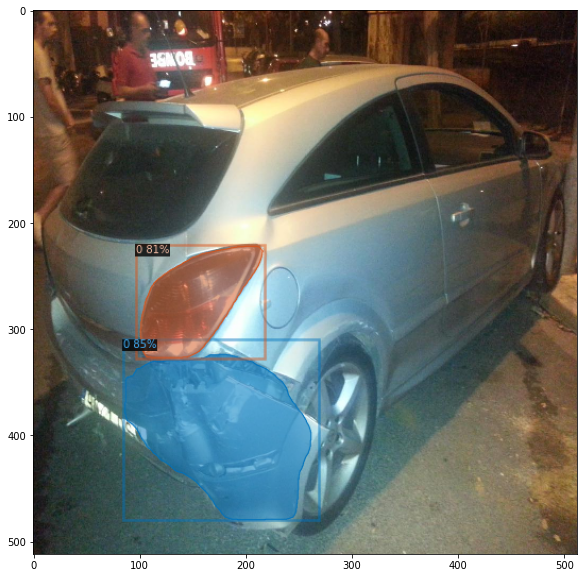

In [17]:
image_path = "../input/damage-detection-dataset/val/24.jpg"
on_image(image_path, predictor)  

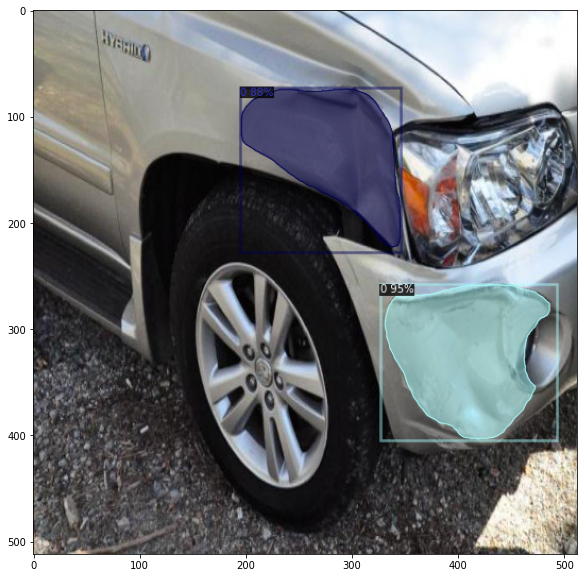

In [18]:
image_path = "../input/damage-detection-dataset/val/8.jpg"
on_image(image_path, predictor)  

### We can see that the model works fairly well. 


The next steps may be exapanding the dataset.